# **Sobre o conjunto de dados** <p>
"Unicórnio" é um termo usado na indústria de capital de risco para descrever uma startup de capital fechado com valor superior a US$ 1 bilhão. O termo foi popularizado pela primeira vez pela capitalista de risco Aileen Lee, fundadora da Cowboy Ventures, um fundo de capital de risco com sede em Palo Alto, Califórnia.

Unicórnios também podem se referir a um fenômeno de recrutamento no setor de recursos humanos (RH). Os gerentes de RH podem ter grandes expectativas para preencher um cargo, levando-os a procurar candidatos com qualificações superiores às exigidas para um cargo específico. Em essência, esses gerentes estão procurando um unicórnio, o que leva a uma desconexão entre seu candidato ideal e quem eles podem contratar do grupo de pessoas disponíveis.

[Download da base de dados](https://www.kaggle.com/ramjasmaurya/unicorn-startups)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
Base_Dados = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/unicorns till sep 2022.csv')

Base_Dados.shape

(1186, 7)

# Nova seção

In [ ]:
Base_Dados.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Investors
0,ByteDance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$127,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100,7/3/2018,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [ ]:
Base_Dados.columns
Base_Dados.insert(0, 'Id', range(000, 000 + len(Base_Dados)))


In [ ]:
Base_Dados.rename( columns={
    'Company' : 'Empresa',
    'Valuation ($B)' : 'Valor ($)',
    'Date Joined' : 'Data de Adesão',
    'Country' : 'Pais',
    'City\xa0' : 'Cidade',
    'Industry': 'Setor',
    'Investors': 'Investidores',
 }, inplace=True)

In [ ]:
Base_Dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              1186 non-null   int64 
 1   Company         1186 non-null   object
 2   Valuation ($B)  1186 non-null   object
 3   Date Joined     1186 non-null   object
 4   Country         1186 non-null   object
 5   City            1186 non-null   object
 6   Industry        1186 non-null   object
 7   Investors       1168 non-null   object
dtypes: int64(1), object(7)
memory usage: 74.2+ KB


In [ ]:
Base_Dados.isnull().sum()

Empresa            0
Valor ($)          0
Data de Adesão     0
Pais               0
Cidade             0
Setor              0
Investidores      18
dtype: int64

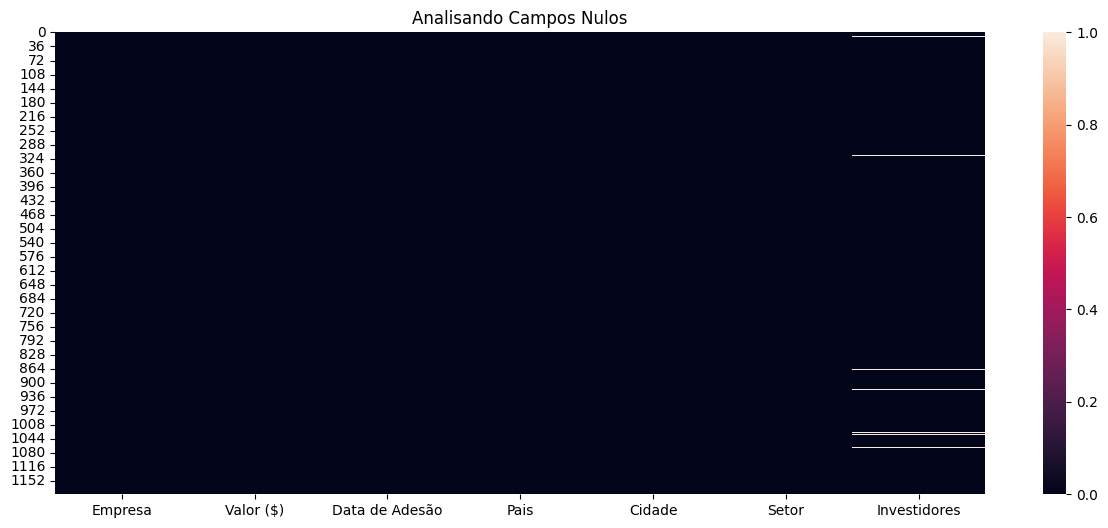

In [ ]:
plt.figure( figsize=(15,6))
plt.title('Analisando Campos Nulos')
sns.heatmap( Base_Dados.isnull() );

In [ ]:
Base_Dados.nunique()

Empresa           1183
Valor ($)          222
Data de Adesão     695
Pais                48
Cidade             286
Setor               34
Investidores      1152
dtype: int64

In [ ]:
Base_Dados['Setor'].unique()

array(['Artificial intelligence', 'Other',
       'E-commerce & direct-to-consumer', 'Fintech',
       'Internet software & services',
       'Supply chain, logistics, & delivery',
       'Data management & analytics',
       'Sequoia Capital, Thoma Bravo, Softbank', 'Edtech', 'Hardware',
       'Consumer & retail', 'Health', 'Auto & transportation',
       'Cybersecurity', 'Mobile & telecommunications', 'Travel',
       'Kuang-Chi',
       'Tiger Global Management, Tiger Brokers, DCM Ventures',
       'Jungle Ventures, Accel, Venture Highway',
       'Artificial Intelligence', 'GIC. Apis Partners, Insight Partners',
       'Vision Plus Capital, GSR Ventures, ZhenFund',
       'Hopu Investment Management, Boyu Capital, DC Thomson Ventures',
       'Internet', '500 Global, Rakuten Ventures, Golden Gate Ventures',
       'Sequoia Capital China, ING, Alibaba Entrepreneurs Fund',
       'Sequoia Capital China, Shunwei Capital Partners, Qualgro',
       'Dragonfly Captial, Qiming Venture Pa

In [ ]:
Base_Dados['Setor'].value_counts()


Fintech                                                               239
Internet software & services                                          224
E-commerce & direct-to-consumer                                       103
Health                                                                 94
Artificial intelligence                                                74
Supply chain, logistics, & delivery                                    65
Other                                                                  65
Cybersecurity                                                          58
Data management & analytics                                            45
Auto & transportation                                                  40
Hardware                                                               38
Mobile & telecommunications                                            37
Edtech                                                                 32
Consumer & retail                     

In [ ]:
Base_Dados['Setor'].value_counts( normalize=True )[0:16]

Fintech                                0.201518
Internet software & services           0.188870
E-commerce & direct-to-consumer        0.086847
Health                                 0.079258
Artificial intelligence                0.062395
Supply chain, logistics, & delivery    0.054806
Other                                  0.054806
Cybersecurity                          0.048904
Data management & analytics            0.037943
Auto & transportation                  0.033727
Hardware                               0.032040
Mobile & telecommunications            0.031197
Edtech                                 0.026981
Consumer & retail                      0.023609
Travel                                 0.011804
Artificial Intelligence                0.009275
Name: Setor, dtype: float64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'Fintech'),
  Text(1, 0, 'Internet software & services'),
  Text(2, 0, 'E-commerce & direct-to-consumer'),
  Text(3, 0, 'Health'),
  Text(4, 0, 'Artificial intelligence'),
  Text(5, 0, 'Supply chain, logistics, & delivery'),
  Text(6, 0, 'Other'),
  Text(7, 0, 'Cybersecurity'),
  Text(8, 0, 'Data management & analytics'),
  Text(9, 0, 'Auto & transportation'),
  Text(10, 0, 'Hardware'),
  Text(11, 0, 'Mobile & telecommunications'),
  Text(12, 0, 'Edtech'),
  Text(13, 0, 'Consumer & retail'),
  Text(14, 0, 'Travel'),
  Text(15, 0, 'Artificial Intelligence')])

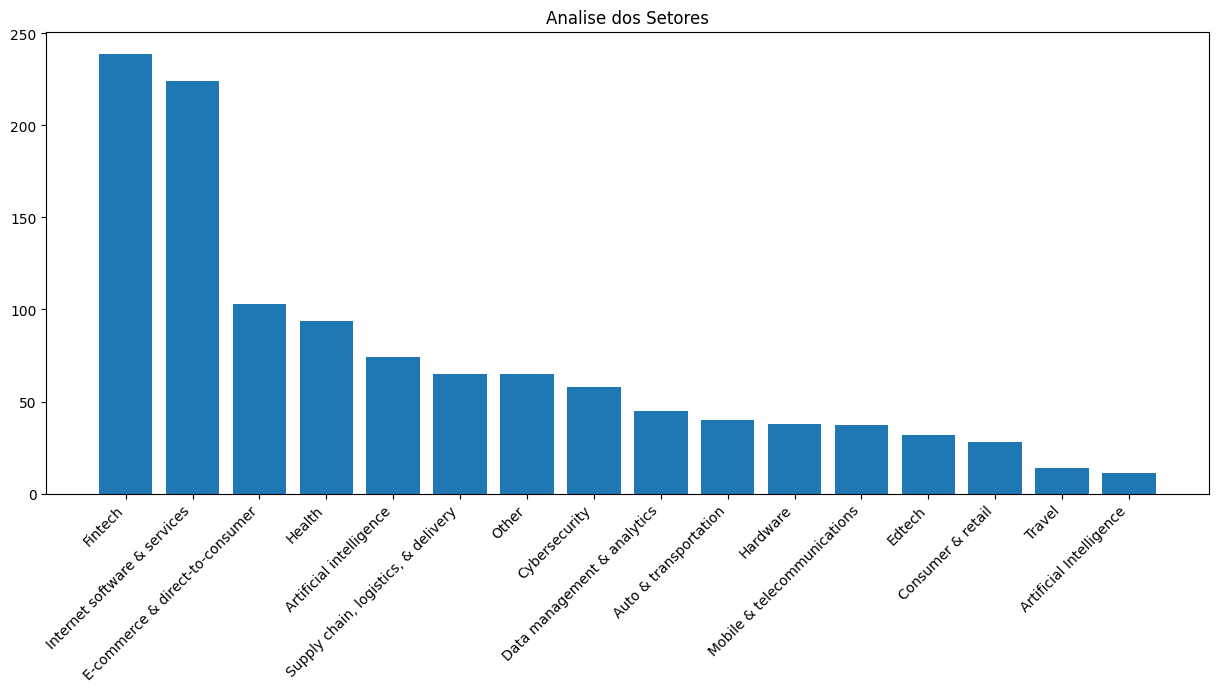

In [ ]:
plt.figure( figsize=(15,6))
plt.title('Analise dos Setores')
plt.bar( Base_Dados['Setor'].value_counts()[0:16].index, Base_Dados['Setor'].value_counts()[0:16] );
plt.xticks( rotation=45, ha='right' )

In [ ]:
Base_Dados['Pais'].value_counts()

United States           636
China                   174
India                    70
United Kingdom           46
Germany                  29
France                   24
Israel                   22
Canada                   19
Brazil                   17
South Korea              17
Singapore                13
Sweden                    8
Mexico                    8
Australia                 8
Indonesia                 7
Netherlands               7
Hong Kong                 7
Ireland                   6
Japan                     6
Switzerland               6
Norway                    5
Finland                   4
Spain                     4
Turkey                    3
Colombia                  3
Belgium                   3
United Arab Emirates      3
Austria                   2
Lithuania                 2
Vietnam                   2
Thailand                  2
Estonia                   2
Chile                     2
Denmark                   2
Philippines               2
Croatia             

In [ ]:
Analise = round( Base_Dados['Pais'].value_counts( normalize=True ) * 100,1)

In [ ]:
Analise

United States           53.6
China                   14.7
India                    5.9
United Kingdom           3.9
Germany                  2.4
France                   2.0
Israel                   1.9
Canada                   1.6
Brazil                   1.4
South Korea              1.4
Singapore                1.1
Sweden                   0.7
Mexico                   0.7
Australia                0.7
Indonesia                0.6
Netherlands              0.6
Hong Kong                0.6
Ireland                  0.5
Japan                    0.5
Switzerland              0.5
Norway                   0.4
Finland                  0.3
Spain                    0.3
Turkey                   0.3
Colombia                 0.3
Belgium                  0.3
United Arab Emirates     0.3
Austria                  0.2
Lithuania                0.2
Vietnam                  0.2
Thailand                 0.2
Estonia                  0.2
Chile                    0.2
Denmark                  0.2
Philippines   

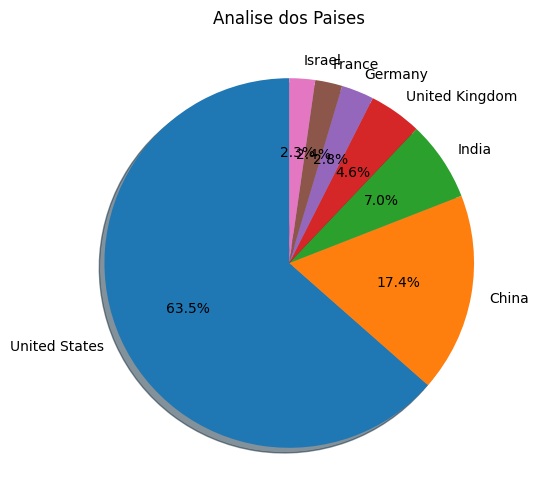

In [ ]:
plt.figure( figsize=(15,6))
plt.title('Analise dos Paises')
plt.pie(
    Analise[0:7],
    labels = Analise[0:7].index,
    shadow=True,
    startangle=90,
    autopct='%1.1f%%'
);


In [ ]:
Base_Dados['Data de Adesão'] = pd.to_datetime( Base_Dados['Data de Adesão'])
Base_Dados['Data de Adesão'].head()

0   2017-04-07
1   2012-12-01
2   2018-07-03
3   2014-01-23
4   2018-01-08
Name: Data de Adesão, dtype: datetime64[ns]

In [ ]:
Base_Dados['Mes'] = pd.DatetimeIndex( Base_Dados['Data de Adesão'] ).month
Base_Dados['Ano'] = pd.DatetimeIndex( Base_Dados['Data de Adesão'] ).year

Base_Dados.head()

,Id,Empresa,Valor ($),Data de Adesão,Pais,Cidade,Setor,Investidores,Mes,Ano
0,0,ByteDance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,1,SpaceX,$127,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,2,SHEIN,$100,7/3/2018,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China...",7,2018
3,3,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
4,4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018


In [ ]:
Analise_Agrupada = Base_Dados.groupby( by=['Empresa','Pais', 'Ano', 'Mes'] ).count()['Id'].reset_index()

In [ ]:
Analise_Agrupada

,Empresa,Pais,Ano,Mes,Id
0,0x,United States,2022,4,1
1,1047 Games,United States,2021,9,1
2,1KMXC,China,2021,8,1
3,1Password,Canada,2021,7,1
4,4Paradigm,China,2018,12,1
...,...,...,...,...,...
1181,reddit,United States,2017,7,1
1182,solarisBank,Germany,2021,7,1
1183,stori,Mexico,2022,7,1
1184,thatgamecompany,United States,2022,3,1


In [ ]:
Analise_Agrupada.loc[
    Analise_Agrupada['Pais'] == 'Brazil'
]

,Empresa,Pais,Ano,Mes,Id
147,C6 Bank,Brazil,2020,12,1
169,CargoX,Brazil,2021,10,1
220,CloudWalk,Brazil,2021,9,1
248,Creditas,Brazil,2020,12,1
289,Dock,Brazil,2022,5,1
304,EBANX,Brazil,2019,10,1
589,Loft,Brazil,2020,1,1
590,Loggi,Brazil,2019,6,1
607,MadeiraMadeira,Brazil,2021,1,1
671,Movile,Brazil,2018,7,1


In [ ]:
Base_Dados['Valor ($)'] = pd.to_numeric(Base_Dados['Valor ($)'].apply( lambda Linha: Linha.replace('$', '') ))
Base_Dados.head()

,Id,Empresa,Valor ($),Data de Adesão,Pais,Cidade,Setor,Investidores,Mes,Ano
0,0,ByteDance,140.0,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,1,SpaceX,127.0,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,2,SHEIN,100.0,7/3/2018,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China...",7,2018
3,3,Stripe,95.0,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
4,4,Canva,40.0,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018


In [ ]:
Analise_Pais = Base_Dados.groupby ( by=['Pais']).sum()['Valor ($)'].reset_index()
Analise_Pais.head()

,Pais,Valor ($)
0,Argentina,2.45
1,Australia,54.40
2,Austria,7.61
3,Bahamas,32.00
4,Belgium,8.95


In [ ]:
Analise_Valor = Analise_Pais.sort_values('Valor ($)', ascending=False)
Analise_Valor.head()

,Pais,Valor ($)
46,United States,2069.89
9,China,678.59
45,United Kingdom,205.45
20,India,202.92
18,Germany,80.88


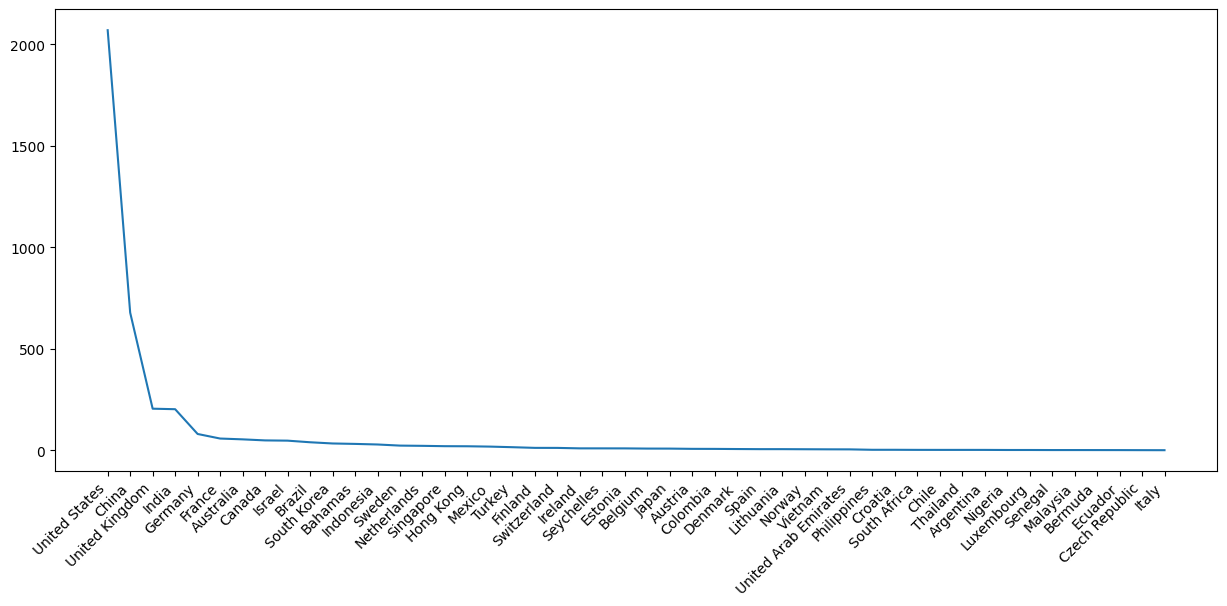

In [ ]:
plt.figure( figsize=(15,6) )
plt.plot( Analise_Valor['Pais'], Analise_Valor['Valor ($)'] )
plt.xticks( rotation=45, ha='right' );